# Project: Visualizing Cell Differentiation

### 1. Background : Stem Cell Differentiation
Every biological cell contains the same "source code" (DNA). However, a heart cell behaves differently from a neuron because they "execute" different parts of that code. In other words, genes are expressed at different levels. In order for cells to reach their fates ('final' type), they have to undergo a journey, the so called **cell differentiation** or **cell specification**. 

Biologists often use the **Waddington Landscape** analogy to describe the process of cell differentiation: imagine a ball rolling down a hilly terrain. At the top, the ball can go down many different valleys. By the bottom, the ball has journeyed through a specific path and is stuck in a specific state.

![alt text](./images/waddington2.png)


### 2. Data

We quantify this execution by measuring the levels of **Gene Expression** throughout development.

In the current project, the data follows **Mouse Embryonic Stem Cells (ESCs)** over a period of 7 days (168 hours). 
At $T=0$, the cells are "Pluripotent"—we can think of them as uninitialized objects that have the potential to become almost any tissue type. As time progresses, they interprete gene expression levels as signals to **differentiate**. At the end of the experiement, we get two cell types: **E14** and **R1**.

The **Single-Cell Gene Expression** dataset at our disposal is the following. 
*   **Dimensions:** Each cell is a data object described by **96 features** (different marker genes, in addition to time and type of cell).

| Feature | Type | Description |
| :--- | :--- | :--- |
| **Time** | `int` | The timestamp of the snapshot (0h, 24h, 48h, 72h, 96h, 120h, 168h). |
| **Type** | `string` | The cell line background (**E14** or **R1**). These are two different "classes" of stem cells. |
| **Genes** | `float` | **96 columns** (e.g., *Actb, Nanog, Sox2...*). These represent the normalized expression level of specific genes. |


*** 
*Data Source & Paper: Patrick S. Stumpf et al., "Stem Cell Differentiation as a Non-Markov Stochastic Process," Cell Systems, 2017.*

### Part 1. Load the dataset
Read the "gene_expression_data.csv" dataset into a pandas dataframe. 

Once loaded, you can use the "head()", "info()" or "describe()" functions for an overview of the dataset and its summary statistics. Below is an example result of head() applied to the dataset.

![alt text](./images/head.png)

Tip: Because the dataset, although high-dimensional, only has 96 columns, you can also open the dataset using Excel and view it in tabular form by using the the "text-to-columns" feature of MS Excel (https://www.youtube.com/watch?v=QyZ6IMkln2U).

In [33]:
########## Part 1. Write your code in this cell ############

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Visuals
sns.set(style="whitegrid")

# 1. Load the dataset
# reading the file currently in the directory
df = pd.read_csv('gene_expression_data.csv')

# 2. Dataframe Inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# 3. Checks for Missing Values
print("\nMissing values:", df.isnull().sum().sum())

Dataset Shape: (672, 100)

First 5 rows:


,Sample,Time,Type,Actb,Bmi1,Bmp4,Bmp7,Bmpr1a,Cd34,Cdh1,...,Trp53,Tubb3,Utf1,Vim,Wdr5,Wnt3a,Wnt5a,Zfp281,Zfp42,Unnamed: 99
0,E14tg2a.0h.1A,0,E14,16.716759,0.00000,26.183448,0.0,25.493528,0.0,25.754394,...,22.225853,25.431561,22.266882,21.747678,22.577380,0.000000,0.0,22.336935,18.880554,NaN
1,E14tg2a.0h.1B,0,E14,11.283763,0.00000,15.379562,0.0,18.535507,0.0,0.000000,...,13.895273,13.837472,16.676966,12.199917,13.884512,18.460856,0.0,13.841466,12.469256,NaN
2,E14tg2a.0h.1C,0,E14,11.356264,0.00000,15.305810,0.0,0.000000,0.0,0.000000,...,14.426960,15.933678,19.744670,11.956928,14.371542,0.000000,0.0,13.996737,10.913159,NaN
3,E14tg2a.0h.1D,0,E14,10.923010,18.05053,16.744032,0.0,17.100323,0.0,0.000000,...,14.508559,13.673305,16.911726,11.703409,14.501776,0.000000,0.0,14.106204,11.555227,NaN
4,E14tg2a.0h.1E,0,E14,10.334779,18.60766,16.693236,0.0,17.364452,0.0,0.000000,...,13.763772,12.942459,16.411662,11.049555,14.158724,0.000000,0.0,13.441827,11.914481,NaN



Missing values: 672


### Part 2. Visualize some data
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all genes. In this part, we will restrict our focus on two genes: "Bmp4" and "Nanog".

Create a figure with two plots (one for each gene), where each plot shows, at each time (0H, 24H, ..., 168H), the statistics of expresssion levels of the genes in cells. What plot types are appropriate for this ?
Hint: you may want to have time on the x-asis  

Bonus: There are two types of cells in the dataset (E14 and R1). Can you enhance the plot to visualize the expression levels within each cell type ? What do you observe ?

/var/folders/q3/gsj2q2v94t9c50rtf_gqljw40000gn/T/ipykernel_55404/2265372669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time', data=df, palette='viridis')
/var/folders/q3/gsj2q2v94t9c50rtf_gqljw40000gn/T/ipykernel_55404/2265372669.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2')


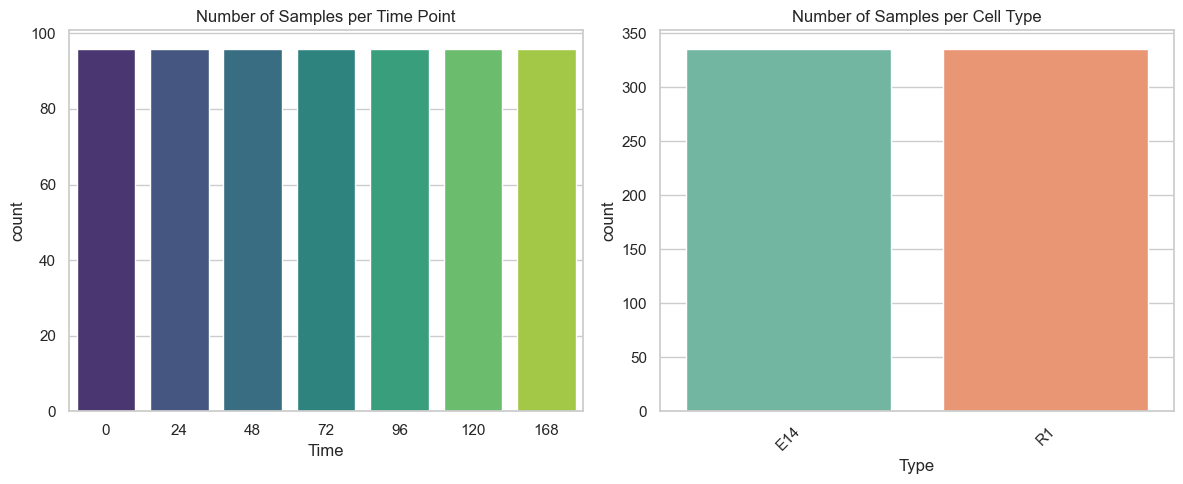

/var/folders/q3/gsj2q2v94t9c50rtf_gqljw40000gn/T/ipykernel_55404/2265372669.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time', y='Nanog', data=df, palette='viridis')


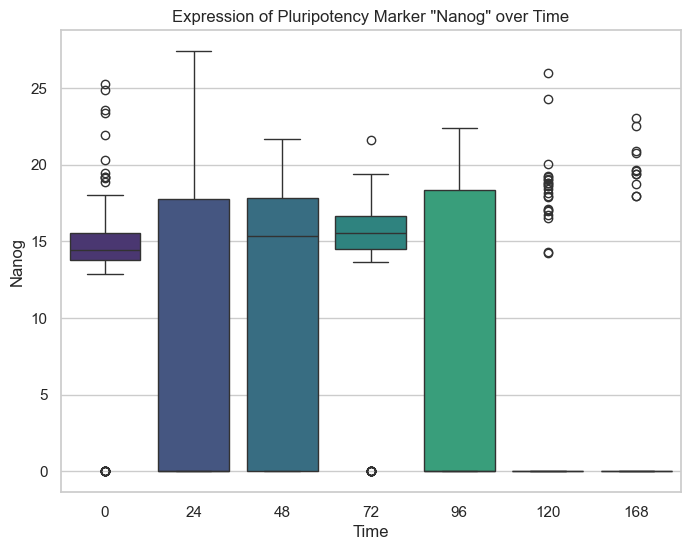

In [34]:
########## Part 2. Write your code in this cell ############

# 1. Visualize sample distribution across Time points
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Time', data=df, palette='viridis')
plt.title('Number of Samples per Time Point')

# 2. Visualizing the distribution of Cell Types
plt.subplot(1, 2, 2)
sns.countplot(x='Type', data=df, palette='Set2')
plt.title('Number of Samples per Cell Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Visualizing specific "Marker Gene" (e.g., Nanog - a stem cell marker)
# Nanog levels should drop as cells differentiate (Time increases)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Time', y='Nanog', data=df, palette='viridis')
plt.title('Expression of Pluripotency Marker "Nanog" over Time')
plt.show()

### Part 3. Relationships between genes
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all relationships between our variables (genes). However, as in almost every real-world datasets, variables entertain strong or weak relations. In this part, we will try to identity which genes that have strong ties, and attempt to visualize how the behave together.

Once more, because the dataset is multi-dimensional, we will restrict our analysis to the subset of genes (although we can get away with an analysis of the whole set of genes in our current scenario of "just" 96 genes) 

    genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4'].

Create a figure with the following plots:

1. A **correlation heatmap** showing the correlations of all genes above at time O
2. A **correlation heatmap** showing the correlations of all genes above at time 168
3. From the first plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 168. What do you observe ?
4. From the second plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 0. What do you observe ?

Bonus: i.Think about improvements you could make on the scatter plots. What comes to mind ? Create a figure with two plots (Hint: different colors and/or markers for the two different cell types, etc.)
ii. How does the relationship of the 2 genes picked at (3.) evolve through all time points (0,24,48,72,69,120,144,168) ? What plot(s) can you use for this ? 

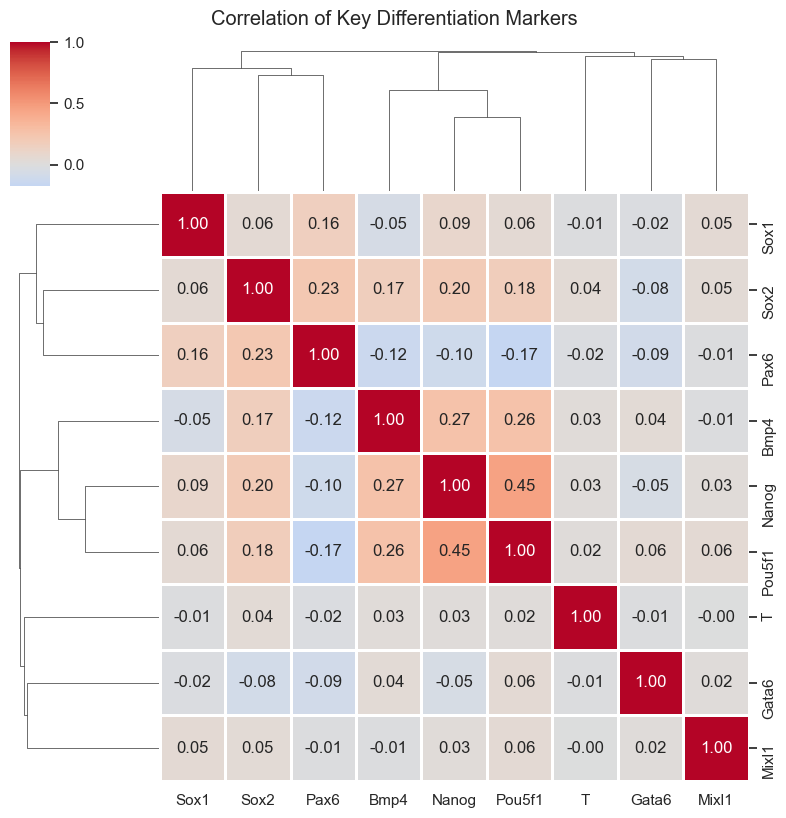

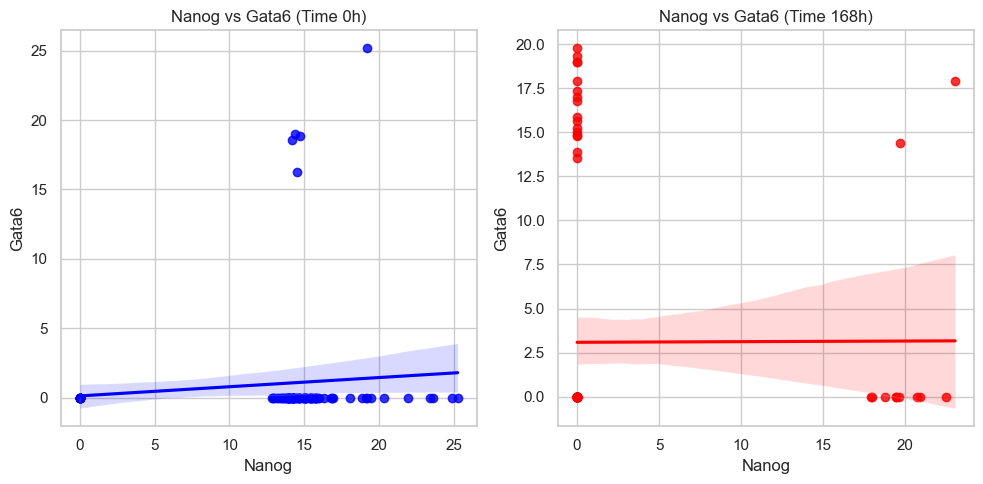

In [35]:
########## Part 3. Write your code in this cell ############

# 1. Define a list of "Key Marker Genes"
# We choose specific genes that represent Pluripotency (Stem Cells)
# and Differentiation (Germ Layers).
# Nanog/Sox2/Pou5f1 = Stem Cell Markers
# Gata6/Sox17 = Endoderm
# T/Mixl1 = Mesoderm
# Sox1/Pax6 = Ectoderm
selected_genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'T', 'Mixl1', 'Sox1', 'Pax6', 'Bmp4']

# Filter data to just these genes
subset_df = df[selected_genes]

# 2. Compute Correlation
corr_matrix = subset_df.corr()

# 3. Plot a Clustermap (The Pro Version of a Heatmap)
# This automatically groups genes that behave similarly!
g = sns.clustermap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=.75,
    figsize=(8, 8),
    annot=True, 
    fmt=".2f"
)
g.fig.suptitle('Correlation of Key Differentiation Markers', y=1.02)
plt.show()


# relationship changes between Nanog (Stem) and Gata6 (Diff).
plt.figure(figsize=(10, 5))

# Early (Time 0)
plt.subplot(1, 2, 1)
sns.regplot(x='Nanog', y='Gata6', data=df[df['Time']==0], color='blue')
plt.title('Nanog vs Gata6 (Time 0h)')

# Late (Time 168)
plt.subplot(1, 2, 2)
sns.regplot(x='Nanog', y='Gata6', data=df[df['Time']==168], color='red')
plt.title('Nanog vs Gata6 (Time 168h)')

plt.tight_layout()
plt.show()

### Part 4. Dimensionality Reduction (PCA)
We can only do so much in trying to visualize our dataset one variable at the time, or 2 variables at the time. Our dataset is high-dimensional, we must therefore use appropriate methods to visualize it. Most notably, dimensionality reduction methods.

1. Perform **Principal Component Analysis (PCA)** on the data, keeping only 2 dimensions
(Hint: you don't need to pass columns 'Time' and 'Type' to PCA as they do not contain information on genes. Extract just genes columns and pass it to PCA. The line below shows how you can 'drop' those columns)

    X = df.drop(['Time', 'Type'], axis=1)

2. Determine the 'importance' of each of your principal component ? How do you inteprete that ?

3. Create a scatter plot on the resulting two dimensional data (PC1 vs PC2). What do you observe ? Can you identify different trajectories in time for different cell types (E14, R1) ?

4. Enhance the scatter plot using different marker types for cell type (E14, R1) and different colors for time (0, 24, ..., 268). What do you observe ?

Bonus: Perform **Principal Component Analysis (PCA)** on the data, this time keeping 3 dimensions. Redo steps 1-4

Variance Explained: PC1 = 20.1%, PC2 = 6.9%


/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normaliz

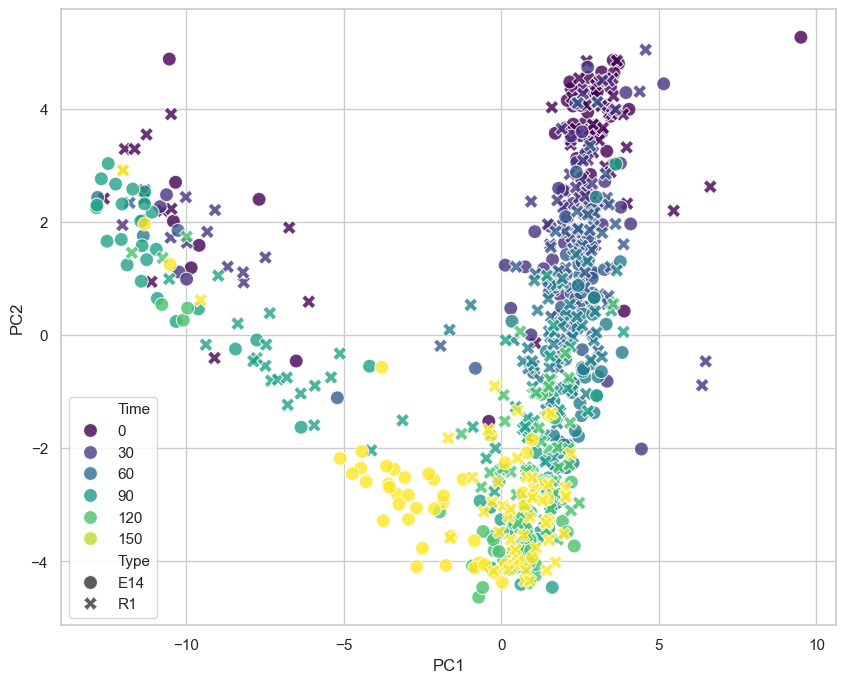

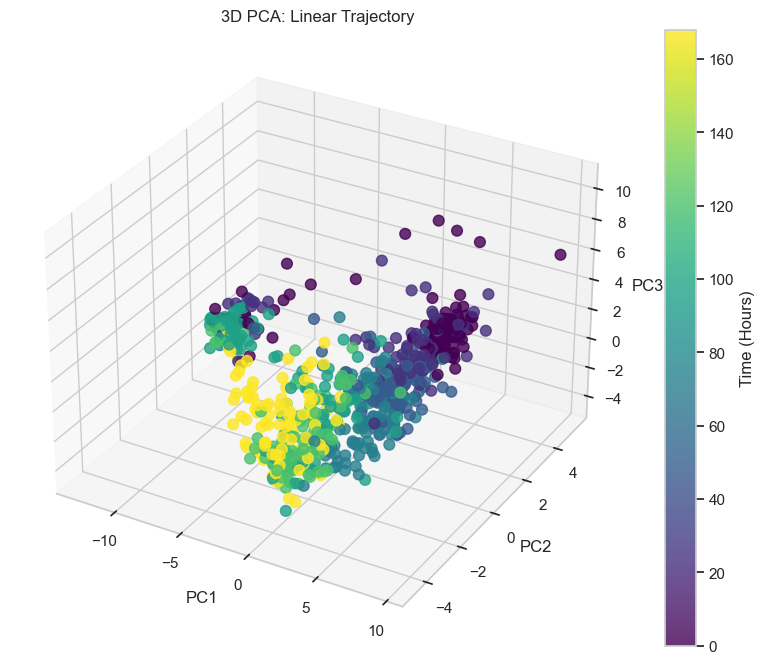

/var/folders/q3/gsj2q2v94t9c50rtf_gqljw40000gn/T/ipykernel_55404/396168269.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


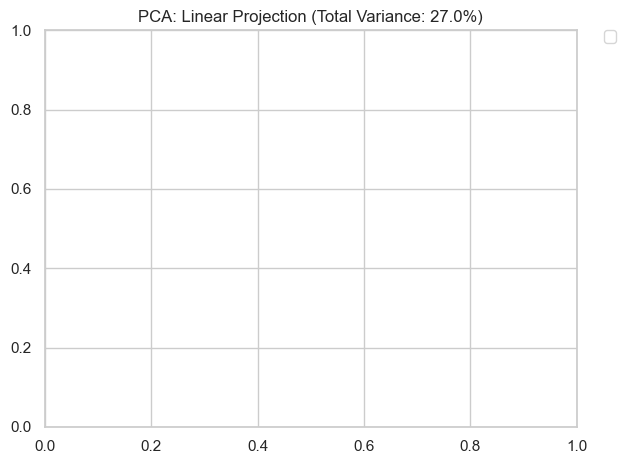

In [ ]:
########## Part 4. Write your code in this cell ############

# Re-define the full gene dataset (dropping metadata columns 0-2)
gene_data = df.iloc[:, 3:].dropna(axis=1, how='all')

# 1. Standardize the data
# We use the clean 'gene_data' from Part 3
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gene_data)

# 2. Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 3. Create a DataFrame for the results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Time'] = df['Time']
pca_df['Type'] = df['Type']

# 4. Calculate Variance Explained
var1 = pca.explained_variance_ratio_[0] * 100
var2 = pca.explained_variance_ratio_[1] * 100
print(f"Variance Explained: PC1 = {var1:.1f}%, PC2 = {var2:.1f}%")

# 5. Visualize PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Time', palette='viridis',
    style='Type',
    data=pca_df,
    s=100, alpha=0.8
)

from mpl_toolkits.mplot3d import Axes3D

# 1. Run PCA with 3 Components
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(X_scaled)

# 2. Create 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    pca_result_3d[:, 0],
    pca_result_3d[:, 1],
    pca_result_3d[:, 2],
    c=df['Time'],     
    cmap='viridis',
    s=60,
    alpha=0.8
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA: Linear Trajectory')
plt.colorbar(sc, label='Time (Hours)')
plt.show()
plt.title(f'PCA: Linear Projection (Total Variance: {var1+var2:.1f}%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

### Part 5. Dimensionality Reduction (Non-linear methods)
Non-linear dimensionality reduction (t-SNE, UMAP) methods usually produce better visualisations than PCA

1. Redo steps 1,3,4 of the previous part (keeping only 2 components, then 3 components) using a non-linear reduction method of your choice (**t-SNE** or **UMAP**). What do you observe ? How is the visulisation produced compared to the visual result of PCA ?


Bonus: Redo step 1 using the dimensionality reduction method **isomap** (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)

/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:374: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/anirudh/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:375: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normaliz

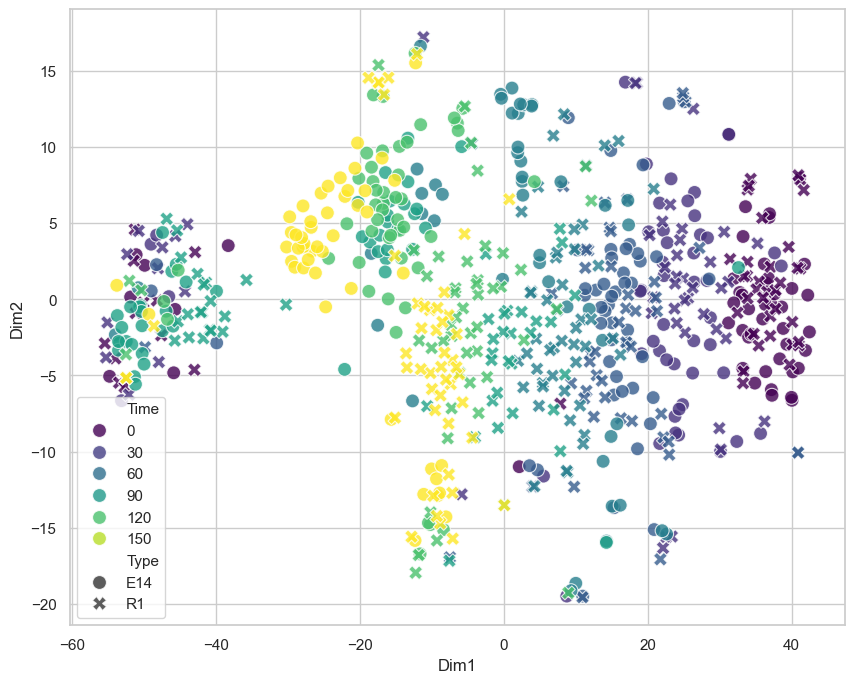

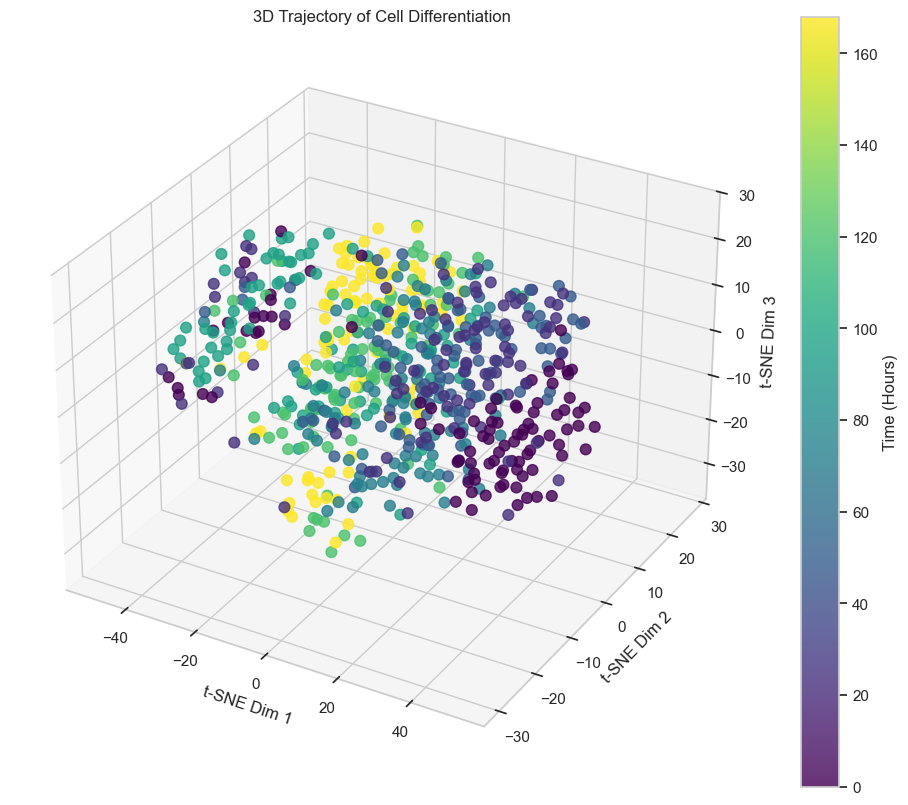

/var/folders/q3/gsj2q2v94t9c50rtf_gqljw40000gn/T/ipykernel_55404/4149087809.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


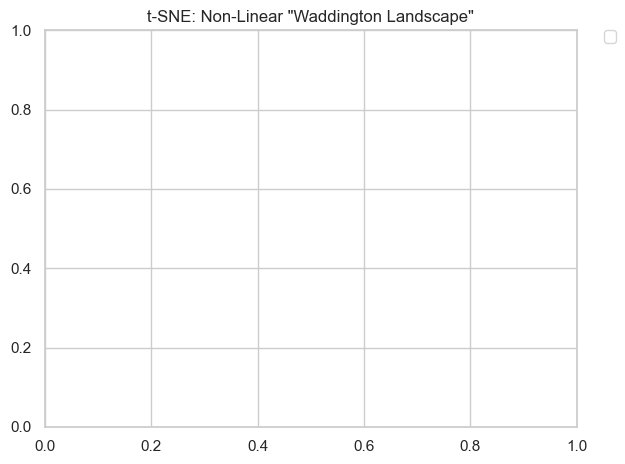

In [37]:
########## Part 5. Write your code in this cell ############

# 1. Run t-SNE (Non-linear)
# It will use the default number of iterations (usually 1000), which is perfect.
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

# 2. Create DataFrame for results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['Time'] = df['Time']
tsne_df['Type'] = df['Type']

# 3. Visualize t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='Time', palette='viridis',
    style='Type',
    data=tsne_df,
    s=100, alpha=0.8
)

from mpl_toolkits.mplot3d import Axes3D 
# 1. Run t-SNE with 3 components (3D)
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_result_3d = tsne_3d.fit_transform(X_scaled)

# 2. Create a 3D Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Map time to colors (0=Purple, 168=Yellow)
sc = ax.scatter(
    tsne_result_3d[:, 0],
    tsne_result_3d[:, 1],
    tsne_result_3d[:, 2],
    c=df['Time'],       # Color by Time
    cmap='viridis',     # Same color theme
    s=60,               # Dot size
    alpha=0.8
)

# Add labels
ax.set_xlabel('t-SNE Dim 1')
ax.set_ylabel('t-SNE Dim 2')
ax.set_zlabel('t-SNE Dim 3')
ax.set_title('3D Trajectory of Cell Differentiation')

# Add a color bar
plt.colorbar(sc, label='Time (Hours)')
plt.show()
plt.title('t-SNE: Non-Linear "Waddington Landscape"')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()